In [1]:
from datasets.get_datasets import *
import time
from src.genetic import *

from src.predicate import *
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
bk = {
      'imdb': ['workedunder(+person,+person).',
              'workedunder(+person,-person).',
              'workedunder(-person,+person).',
              'female(+person).',
              'actor(+person).',
              'director(+person).',
              'movie(+movie,+person).',
              'movie(+movie,-person).',
              'movie(-movie,+person).',
              'genre(+person,+genre).'],
      'uwcse': ['professor(+person).',
        'student(+person).',
        'advisedby(+person,+person).',
        'advisedby(+person,-person).',
        'advisedby(-person,+person).',
        'tempadvisedby(+person,+person).',
        'tempadvisedby(+person,-person).',
        'tempadvisedby(-person,+person).',
        'ta(+course,+person,+quarter).',
        'ta(-course,-person,+quarter).',
        'ta(+course,-person,-quarter).',
        'ta(-course,+person,-quarter).',
        'hasposition(+person,+faculty).',
        'hasposition(+person,-faculty).',
        'hasposition(-person,+faculty).',
        'publication(+title,+person).',
        'publication(+title,-person).',
        'publication(-title,+person).',
        'inphase(+person,+prequals).',
        'inphase(+person,-prequals).',
        'inphase(-person,+prequals).',
        'courselevel(+course,+level).',
        'courselevel(+course,-level).',
        'courselevel(-course,+level).',
        'yearsinprogram(+person,+year).',
        'yearsinprogram(-person,+year).',
        'yearsinprogram(+person,-year).',
        'projectmember(+project,+person).',
        'projectmember(+project,-person).',
        'projectmember(-project,+person).',
        'sameproject(+project,+project).',
        'sameproject(+project,-project).',
        'sameproject(-project,+project).',
        'samecourse(+course,+course).',
        'samecourse(+course,-course).',
        'samecourse(-course,+course).',
        'sameperson(+person,+person).',
        'sameperson(+person,-person).',
        'sameperson(-person,+person).',],
      'cora': ['sameauthor(+author,+author).',
              'sameauthor(+author,-author).',
              'sameauthor(-author,+author).',
              'samebib(+class,+class).',
              'samebib(+class,-class).',
              'samebib(-class,+class).',
              'sametitle(+title,+title).',
              'sametitle(+title,-title).',
              'sametitle(-title,+title).',
              'samevenue(+venue,+venue).',
              'samevenue(+venue,-venue).',
              'samevenue(-venue,+venue).',
              'author(+class,+author).',
              'author(+class,-author).',
              'author(-class,+author).',
              'title(+class,+title).',
              'title(+class,-title).',
              'title(-class,+title).',
              'venue(+class,+venue).',
              'venue(+class,-venue).',
              'venue(-class,+venue).',
              'haswordauthor(+author,+word).',
              'haswordauthor(+author,-word).',
              'haswordauthor(-author,+word).',
              'haswordtitle(+title,+word).',
              'haswordtitle(+title,-word).',
              'haswordtitle(-title,+word).',
              'haswordvenue(+venue,+word).',
              'haswordvenue(+venue,-word).',
              'haswordvenue(-venue,+word).'],
      'webkb': ['coursepage(+page).',
                'facultypage(+page).',
                'studentpage(+page).',
                'researchprojectpage(+page).',
                'linkto(+id,+page,+page).',
                'linkto(+id,-page,-page).',
                'linkto(-id,-page,+page).',
                'linkto(-id,+page,-page).',
                'has(+word,+page).',
                'has(+word,-page).',
                'has(-word,+page).',
                'hasalphanumericword(+id).',
                'allwordscapitalized(+id).',
                'instructorsof(+page,+page).',
                'instructorsof(+page,-page).',
                'instructorsof(-page,+page).',
                'hasanchor(+word,+page).',
                'hasanchor(+word,-page).',
                'hasanchor(-word,+page).',
                'membersofproject(+page,+page).',
                'membersofproject(+page,-page).',
                'membersofproject(-page,+page).',
                'departmentof(+page,+page).',
                'departmentof(+page,-page).',
                'departmentof(-page,+page).',
                'pageclass(+page,+class).',
                'pageclass(+page,-class).',
                'pageclass(-page,+class).'],
      'twitter': ['accounttype(+account,+type).',
                  'accounttype(+account,-type).',
                  'accounttype(-account,+type).',
                  'tweets(+account,+word).',
                  'tweets(+account,-word).',
                  'tweets(-account,+word).',
                  'follows(+account,+account).',
                  'follows(+account,-account).',
                  'follows(-account,+account).',],
      'yeast': ['location(+protein,+loc).',
                'location(+protein,-loc).',
                'location(-protein,+loc).',
                'interaction(+protein,+protein).',
                'interaction(+protein,-protein).',
                'interaction(-protein,+protein).',
                'proteinclass(+protein,+class).',
                'proteinclass(+protein,-class).',
                'proteinclass(-protein,+class).',
                'enzyme(+protein,+enz).',
                'enzyme(+protein,-enz).',
                'enzyme(-protein,+enz).',
                'function(+protein,+fun).',
                'function(+protein,-fun).',
                'function(-protein,+fun).',
                'complex(+protein,+com).',
                'complex(+protein,-com).',
                'complex(-protein,+com).',
                'phenotype(+protein,+phe).',
                'phenotype(+protein,-phe).',
                'phenotype(-protein,+phe).'],
      'nell_sports': ['athleteledsportsteam(+athlete,+sportsteam).',
              'athleteledsportsteam(+athlete,-sportsteam).',
              'athleteledsportsteam(-athlete,+sportsteam).',
              'athleteplaysforteam(+athlete,+sportsteam).',
              'athleteplaysforteam(+athlete,-sportsteam).',
              'athleteplaysforteam(-athlete,+sportsteam).',
              'athleteplaysinleague(+athlete,+sportsleague).',
              'athleteplaysinleague(+athlete,-sportsleague).',
              'athleteplaysinleague(-athlete,+sportsleague).',
              'athleteplayssport(+athlete,+sport).',
              'athleteplayssport(+athlete,-sport).',
              'athleteplayssport(-athlete,+sport).',
              'teamalsoknownas(+sportsteam,+sportsteam).',
              'teamalsoknownas(+sportsteam,-sportsteam).',
              'teamalsoknownas(-sportsteam,+sportsteam).',
              'teamplaysagainstteam(+sportsteam,+sportsteam).',
              'teamplaysagainstteam(+sportsteam,-sportsteam).',
              'teamplaysagainstteam(-sportsteam,+sportsteam).',
              'teamplaysinleague(+sportsteam,+sportsleague).',
              'teamplaysinleague(+sportsteam,-sportsleague).',
              'teamplaysinleague(-sportsteam,+sportsleague).',
              'teamplayssport(+sportsteam,+sport).',
              'teamplayssport(+sportsteam,-sport).',
              'teamplayssport(-sportsteam,+sport).'],
      'nell_finances': ['countryhascompanyoffice(+country,+company).',
                        'countryhascompanyoffice(+country,-company).',
                        'countryhascompanyoffice(-country,+company).',
                        'companyeconomicsector(+company,+sector).',
                        'companyeconomicsector(+company,-sector).',
                        'companyeconomicsector(-company,+sector).',
                        'economicsectorcompany(+sector,-company).',
                        'economicsectorcompany(-sector,+company).',
                        'companyceo(+company,+person).',
                        'companyceo(+company,-person).',
                        'companyceo(-company,+person).',
                        'companyalsoknownas(+company,+company).',
                        'companyalsoknownas(+company,-company).',
                        'companyalsoknownas(-company,+company).',
                        'cityhascompanyoffice(+city,+company).',
                        'cityhascompanyoffice(+city,-company).',
                        'cityhascompanyoffice(-city,+company).',
                        'acquired(+company,+company).',
                        'acquired(+company,-company).',
                        'acquired(-company,+company).',
                        'bankbankincountry(+person,+country).',
                        'bankbankincountry(+person,-country).',
                        'bankbankincountry(-person,+country).',
                        'bankboughtbank(+company,+company).',
                        'bankboughtbank(+company,-company).',
                        'bankboughtbank(-company,+company).',
                        'bankchiefexecutiveceo(+company,+person).',
                        'bankchiefexecutiveceo(+company,-person).',
                        'bankchiefexecutiveceo(-company,+person).']}


In [3]:
bk_source = bk['yeast']
bk_target = bk['twitter']

In [4]:
yeast_dataset = datasets.load('yeast', bk_source, target='interaction', seed=441773) #facts, pos, neg
twitter_dataset = datasets.load('twitter', bk_target, target='follows', seed=441773) #facts, pos, neg

In [5]:
train_facts_source = []
train_pos_source = []
train_neg_source = []
for i in range(0, len(yeast_dataset)):
    train_facts_source.extend(yeast_dataset[0][i])
    train_pos_source.extend(yeast_dataset[1][i])
    train_neg_source.extend(yeast_dataset[2][i])

In [6]:
target = ['interaction']
background_knowledge_src = boostsrl.modes(bk_source, target, useStdLogicVariables=False, 
                                          maxTreeDepth=3, nodeSize=2, numOfClauses=8)

model_src = boostsrl.train(background_knowledge_src, train_pos_source, train_neg_source, train_facts_source, trees=10)

In [7]:
structured_src = []
for i in range(0, 10):
    try:
        structured_src.append(model_src.get_structured_tree(treenumber=i+1).copy())
    except:
        structured_src.append(model_src.get_structured_tree(treenumber='combine').copy())

In [8]:
#pred_target é : pred_target = [('movie', '+,-'), ('director', '+'),...]
import re
pred_target = []
for pred in bk_target:
    modes = ','.join([pred[occur.start()] for occur in re.finditer('[+\-]', pred)])
    pred_target.append((pred.split('(')[0], modes))

In [9]:
def get_branch(curr_value, next_value):
    if curr_value == '': 
        return next_value
    return '{},{}'.format(curr_value, next_value)

def define_individual(structured_tree, tree_number):
    individual_tree = []
    target = structured_tree[0]
    nodes = structured_tree[1]
    for values, node in nodes.items():
        if values == '': 
            branch = '{} :- {}.'.format(target, node)
        else: branch = '{}.'.format(node)
        left_branch = 'true' if get_branch(values, 'true') in nodes  else 'false'
        right_branch = 'true' if get_branch(values, 'false') in nodes else 'false'
        individual_tree.append('{};{};{};{};{}'.format(tree_number, values, 
                                                  branch, left_branch, right_branch))
    return individual_tree

src_struct = copy.deepcopy(structured_src)
new_src_struct = []
for i in range(0, len(src_struct)):
    new_src_struct.append(define_individual(src_struct[i], i))


In [10]:
train_facts = twitter_dataset[0][0:]
train_pos = twitter_dataset[1][0:]
train_neg = twitter_dataset[2][0:]

test_facts = twitter_dataset[0][0]
test_pos = twitter_dataset[1][0]
test_neg = twitter_dataset[2][0]

In [12]:
start = time.time()
pred = Predicate(bk_source, bk_target, pred_target)
aa = genetic(new_src_struct, 'follows', 'interaction', pred, train_pos, 
                        train_neg, train_facts,
                        NUM_GEN=15, pop_size=30)
print("FIM: ", time.time()-start)

MEDIA
AUC PR:  0.6891375
AUC ROC:  0.7051835
CLL:  -0.651953
PREC:  0.63156675
RECALL:  0.5141895000000001
F1:  0.614392
-------------------
STD
AUC PR:  0.008893499999999999
AUC ROC:  0.018585499999999977
CLL:  0.0016279999999999628
PREC:  0.13208259152396845
RECALL:  0.015471500000000027
F1:  0.01638999999999996
-------------------
MEDIA
AUC PR:  0.6891375
AUC ROC:  0.7051835
CLL:  -0.651953
PREC:  0.63156675
RECALL:  0.5141895000000001
F1:  0.614392
-------------------
STD
AUC PR:  0.008893499999999999
AUC ROC:  0.018585499999999977
CLL:  0.0016279999999999628
PREC:  0.13208259152396845
RECALL:  0.015471500000000027
F1:  0.01638999999999996
-------------------
MEDIA
AUC PR:  0.6891375
AUC ROC:  0.7051835
CLL:  -0.651953
PREC:  0.63156675
RECALL:  0.5141895000000001
F1:  0.614392
-------------------
STD
AUC PR:  0.008893499999999999
AUC ROC:  0.018585499999999977
CLL:  0.0016279999999999628
PREC:  0.13208259152396845
RECALL:  0.015471500000000027
F1:  0.01638999999999996
------------

MEDIA
AUC PR:  0.6891375
AUC ROC:  0.7051835
CLL:  -0.651953
PREC:  0.63156675
RECALL:  0.5141895000000001
F1:  0.614392
-------------------
STD
AUC PR:  0.008893499999999999
AUC ROC:  0.018585499999999977
CLL:  0.0016279999999999628
PREC:  0.13208259152396845
RECALL:  0.015471500000000027
F1:  0.01638999999999996
-------------------
MEDIA
AUC PR:  0.6891375
AUC ROC:  0.7051835
CLL:  -0.651953
PREC:  0.63156675
RECALL:  0.5141895000000001
F1:  0.614392
-------------------
STD
AUC PR:  0.008893499999999999
AUC ROC:  0.018585499999999977
CLL:  0.0016279999999999628
PREC:  0.13208259152396845
RECALL:  0.015471500000000027
F1:  0.01638999999999996
-------------------
MEDIA
AUC PR:  0.6891375
AUC ROC:  0.7051835
CLL:  -0.651953
PREC:  0.63156675
RECALL:  0.5141895000000001
F1:  0.614392
-------------------
STD
AUC PR:  0.008893499999999999
AUC ROC:  0.018585499999999977
CLL:  0.0016279999999999628
PREC:  0.13208259152396845
RECALL:  0.015471500000000027
F1:  0.01638999999999996
------------

MEDIA
AUC PR:  0.6921904999999999
AUC ROC:  0.707967
CLL:  -0.646802
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.03673350000000003
AUC ROC:  0.02434900000000001
CLL:  0.006871999999999989
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6921904999999999
AUC ROC:  0.707967
CLL:  -0.646802
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.03673350000000003
AUC ROC:  0.02434900000000001
CLL:  0.006871999999999989
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6921904999999999
AUC ROC:  0.707967
CLL:  -0.646802
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.03673350000000003
AUC ROC:  0.02434900000000001
CLL:  0.006871999999999989
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.0104409999999

MEDIA
AUC PR:  0.6904965000000001
AUC ROC:  0.7086735
CLL:  -0.645882
PREC:  0.5915125
RECALL:  0.594948
F1:  0.635891
-------------------
STD
AUC PR:  0.008077500000000015
AUC ROC:  0.016375500000000043
CLL:  0.006552000000000002
PREC:  0.09237410598620156
RECALL:  0.003921999999999981
F1:  0.009958000000000022
-------------------
MEDIA
AUC PR:  0.646494
AUC ROC:  0.66718
CLL:  -0.658801
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.03434499999999996
AUC ROC:  0.021133999999999986
CLL:  0.0024170000000000025
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.660039
AUC ROC:  0.6771085
CLL:  -0.6532115000000001
PREC:  0.58355075
RECALL:  0.6084095
F1:  0.6357085
-------------------
STD
AUC PR:  0.030581000000000025
AUC ROC:  0.01866049999999997
CLL:  0.001997500000000041
PREC:  0.08688727625888325
RECALL:  0.009539499999999979
F1:  0.010140499999999997
-----------------

MEDIA
AUC PR:  0.6840465
AUC ROC:  0.7011345
CLL:  -0.6363764999999999
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.00863449999999999
AUC ROC:  0.017754500000000006
CLL:  0.008509500000000003
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6840465
AUC ROC:  0.7011345
CLL:  -0.6363764999999999
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.00863449999999999
AUC ROC:  0.017754500000000006
CLL:  0.008509500000000003
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6840465
AUC ROC:  0.7011345
CLL:  -0.6363764999999999
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.00863449999999999
AUC ROC:  0.017754500000000006
CLL:  0.008509500000000003
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.014

MEDIA
AUC PR:  0.6856895000000001
AUC ROC:  0.7062895
CLL:  -0.658534
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007319499999999979
AUC ROC:  0.015304499999999999
CLL:  0.0038619999999999766
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6856895000000001
AUC ROC:  0.7062895
CLL:  -0.658534
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007319499999999979
AUC ROC:  0.015304499999999999
CLL:  0.0038619999999999766
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6856895000000001
AUC ROC:  0.7062895
CLL:  -0.658534
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007319499999999979
AUC ROC:  0.015304499999999999
CLL:  0.0038619999999999766
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.

MEDIA
AUC PR:  0.682866
AUC ROC:  0.7009775
CLL:  -0.6563475
PREC:  0.5915125
RECALL:  0.594948
F1:  0.635891
-------------------
STD
AUC PR:  0.00773299999999999
AUC ROC:  0.016336499999999976
CLL:  0.0063415
PREC:  0.09237410598620156
RECALL:  0.003921999999999981
F1:  0.009958000000000022
-------------------
MEDIA
AUC PR:  0.682866
AUC ROC:  0.7009775
CLL:  -0.6563475
PREC:  0.5915125
RECALL:  0.594948
F1:  0.635891
-------------------
STD
AUC PR:  0.00773299999999999
AUC ROC:  0.016336499999999976
CLL:  0.0063415
PREC:  0.09237410598620156
RECALL:  0.003921999999999981
F1:  0.009958000000000022
-------------------
MEDIA
AUC PR:  0.682866
AUC ROC:  0.7009775
CLL:  -0.6563475
PREC:  0.5915125
RECALL:  0.594948
F1:  0.635891
-------------------
STD
AUC PR:  0.00773299999999999
AUC ROC:  0.016336499999999976
CLL:  0.0063415
PREC:  0.09237410598620156
RECALL:  0.003921999999999981
F1:  0.009958000000000022
-------------------
MEDIA
AUC PR:  0.682866
AUC ROC:  0.7009775
CLL:  -0.6563475


MEDIA
AUC PR:  0.5992415
AUC ROC:  0.6440715
CLL:  -0.67964
PREC:  nan
RECALL:  0.0
F1:  nan
-------------------
STD
AUC PR:  0.0030574999999999908
AUC ROC:  0.008566500000000032
CLL:  0.0016820000000000168
PREC:  nan
RECALL:  0.0
F1:  nan
-------------------
MEDIA
AUC PR:  0.5992415
AUC ROC:  0.6440715
CLL:  -0.67964
PREC:  nan
RECALL:  0.0
F1:  nan
-------------------
STD
AUC PR:  0.0030574999999999908
AUC ROC:  0.008566500000000032
CLL:  0.0016820000000000168
PREC:  nan
RECALL:  0.0
F1:  nan
-------------------
MEDIA
AUC PR:  0.5992415
AUC ROC:  0.6440715
CLL:  -0.67964
PREC:  nan
RECALL:  0.0
F1:  nan
-------------------
STD
AUC PR:  0.0030574999999999908
AUC ROC:  0.008566500000000032
CLL:  0.0016820000000000168
PREC:  nan
RECALL:  0.0
F1:  nan
-------------------
MEDIA
AUC PR:  0.5992415
AUC ROC:  0.6440715
CLL:  -0.67964
PREC:  nan
RECALL:  0.0
F1:  nan
-------------------
STD
AUC PR:  0.0030574999999999908
AUC ROC:  0.008566500000000032
CLL:  0.0016820000000000168
PREC:  nan
RE

MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.64283
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.007350999999999996
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.64283
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.007350999999999996
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.688775
AUC ROC:  0.7105675
CLL:  -0.652741
PREC:  0.62685175
RECALL:  0.4739355
F1:  0.5814165
-------------------
STD
AUC PR:  0.001574999999999993
AUC ROC:  0.009842499999999976
CLL:  0.0033520000000000216
PREC:  0.12695001351393195
RECALL:  0.024782499999999985
F1:  0.01658550000000003
-------------------
MEDIA
A

MEDIA
AUC PR:  0.6830935
AUC ROC:  0.703747
CLL:  -0.648507
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007256499999999999
AUC ROC:  0.016662999999999983
CLL:  0.006574000000000024
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6830935
AUC ROC:  0.703747
CLL:  -0.648507
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007256499999999999
AUC ROC:  0.016662999999999983
CLL:  0.006574000000000024
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6830935
AUC ROC:  0.703747
CLL:  -0.648507
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007256499999999999
AUC ROC:  0.016662999999999983
CLL:  0.006574000000000024
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
---------------

MEDIA
AUC PR:  0.679445
AUC ROC:  0.6951155
CLL:  -0.6522185
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007498000000000005
AUC ROC:  0.017074499999999992
CLL:  0.005518499999999982
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.679445
AUC ROC:  0.6951155
CLL:  -0.6522185
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007498000000000005
AUC ROC:  0.017074499999999992
CLL:  0.005518499999999982
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.679445
AUC ROC:  0.6951155
CLL:  -0.6522185
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007498000000000005
AUC ROC:  0.017074499999999992
CLL:  0.005518499999999982
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
------------

MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.6418845
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.007225499999999996
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.6418845
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.007225499999999996
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.6418845
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.007225499999999996
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
---------------

MEDIA
AUC PR:  0.5924915
AUC ROC:  0.6264505
CLL:  -0.6720345
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.003502500000000019
AUC ROC:  0.009142499999999998
CLL:  0.0031765000000000265
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
-------------------
MEDIA
AUC PR:  0.5924915
AUC ROC:  0.6264505
CLL:  -0.6720345
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.003502500000000019
AUC ROC:  0.009142499999999998
CLL:  0.0031765000000000265
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
-------------------
MEDIA
AUC PR:  0.5924915
AUC ROC:  0.6264505
CLL:  -0.6720345
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.003502500000000019
AUC ROC:  0.009142499999999998
CLL:  0.0031765000000000265
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
---

MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.649035
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.005884
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.649035
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.005884
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.649035
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.005884
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC: 

MEDIA
AUC PR:  0.592573
AUC ROC:  0.6278935
CLL:  -0.673168
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.001485000000000014
AUC ROC:  0.0031915000000000138
CLL:  0.002236999999999989
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
-------------------
MEDIA
AUC PR:  0.592573
AUC ROC:  0.6278935
CLL:  -0.673168
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.001485000000000014
AUC ROC:  0.0031915000000000138
CLL:  0.002236999999999989
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
-------------------
MEDIA
AUC PR:  0.592573
AUC ROC:  0.6278935
CLL:  -0.673168
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.001485000000000014
AUC ROC:  0.0031915000000000138
CLL:  0.002236999999999989
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
---------

MEDIA
AUC PR:  0.592573
AUC ROC:  0.6278935
CLL:  -0.673168
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.001485000000000014
AUC ROC:  0.0031915000000000138
CLL:  0.002236999999999989
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
-------------------
MEDIA
AUC PR:  0.592573
AUC ROC:  0.6278935
CLL:  -0.673168
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.001485000000000014
AUC ROC:  0.0031915000000000138
CLL:  0.002236999999999989
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
-------------------
MEDIA
AUC PR:  0.592573
AUC ROC:  0.6278935
CLL:  -0.673168
PREC:  0.55734975
RECALL:  0.6779335
F1:  0.6437835000000001
-------------------
STD
AUC PR:  0.001485000000000014
AUC ROC:  0.0031915000000000138
CLL:  0.002236999999999989
PREC:  0.057351798404125895
RECALL:  0.05229250000000002
F1:  0.023313500000000043
---------

MEDIA
AUC PR:  0.679445
AUC ROC:  0.6951155
CLL:  -0.639238
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007498000000000005
AUC ROC:  0.017074499999999992
CLL:  0.008552000000000004
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.679445
AUC ROC:  0.6951155
CLL:  -0.639238
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007498000000000005
AUC ROC:  0.017074499999999992
CLL:  0.008552000000000004
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
-------------------
MEDIA
AUC PR:  0.679445
AUC ROC:  0.6951155
CLL:  -0.639238
PREC:  0.63217725
RECALL:  0.43034550000000005
F1:  0.550362
-------------------
STD
AUC PR:  0.007498000000000005
AUC ROC:  0.017074499999999992
CLL:  0.008552000000000004
PREC:  0.13220160393765087
RECALL:  0.018807500000000005
F1:  0.01446900000000001
---------------

MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.639236
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.009332000000000007
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.639236
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.009332000000000007
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6911825
AUC ROC:  0.711758
CLL:  -0.639236
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009242499999999987
AUC ROC:  0.01958800000000005
CLL:  0.009332000000000007
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
------------------

MEDIA
AUC PR:  0.684677
AUC ROC:  0.703126
CLL:  -0.6410235
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009345999999999965
AUC ROC:  0.020000000000000018
CLL:  0.008997499999999992
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.684677
AUC ROC:  0.703126
CLL:  -0.6410235
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009345999999999965
AUC ROC:  0.020000000000000018
CLL:  0.008997499999999992
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.684677
AUC ROC:  0.703126
CLL:  -0.6410235
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.009345999999999965
AUC ROC:  0.020000000000000018
CLL:  0.008997499999999992
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
---------------

MEDIA
AUC PR:  0.6187535
AUC ROC:  0.6462785
CLL:  -0.662902
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.01684849999999999
AUC ROC:  0.016150500000000012
CLL:  0.0044319999999999915
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6187535
AUC ROC:  0.6462785
CLL:  -0.662902
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.01684849999999999
AUC ROC:  0.016150500000000012
CLL:  0.0044319999999999915
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
MEDIA
AUC PR:  0.6187535
AUC ROC:  0.6462785
CLL:  -0.662902
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.01684849999999999
AUC ROC:  0.016150500000000012
CLL:  0.0044319999999999915
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
------------

MEDIA
AUC PR:  0.6299965
AUC ROC:  0.6745019999999999
CLL:  -0.6479365
PREC:  0.577987
RECALL:  0.6175904999999999
F1:  0.636009
-------------------
STD
AUC PR:  0.0211905
AUC ROC:  0.026554000000000022
CLL:  0.009367499999999973
PREC:  0.07960706233431805
RECALL:  0.00035849999999998383
F1:  0.010440999999999978
-------------------
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.662902,) False
(0.653188,) True
(0.6479365,) True
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.653188,) False
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.6479365,) False
(0.633139,) True
bestResult: 0.633139
FIM:  3651.6305458545685


In [13]:
aa

(<src.population.Population at 0x1157e3f70>,
 [0.651953,
  0.646721,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.6363764999999999,
  0.633139,
  0.633139,
  0.633139,
  0.633139])

### Testing the best individual


In [17]:
ind = aa[0].population[-1]

refine = []
for tree in ind.modified_src_tree:
    refine.extend(tree)
    
transfer = ind.transfer.transfer

In [18]:
background_train = boostsrl.modes(bk_target, ['follows'], useStdLogicVariables=False, 
                                          maxTreeDepth=3, nodeSize=2, numOfClauses=8)


In [19]:
tr_train_pos = []
tr_train_neg = []
tr_train_facts = []

for i in range(0, len(train_pos)):
    tr_train_pos.extend(train_pos[i])
    tr_train_neg.extend(train_neg[i])
    tr_train_facts.extend(train_facts[i])

model_tr = boostsrl.train(background_train, tr_train_pos, tr_train_neg, 
                                      tr_train_facts, refine=refine, transfer=transfer,
                                      trees=10)

In [20]:
test_model = boostsrl.test(model_tr, test_pos, test_neg, 
                                       test_facts, trees=10)
test_model.summarize_results()

{'AUC ROC': 0.647948,
 'AUC PR': 0.608806,
 'CLL': -0.657304,
 'Precision': [0.633377, 0.5],
 'Recall': 0.617949,
 'F1': 0.625568}

### Verifying results

In [21]:
f_results = test_model.inference_results('follows')

In [22]:
y_pred = []
y_true = []

for key, value in f_results.items():
    if '!' in key:
        y_true.append(0)
        y_pred.append(0) if value > 0.5 else y_pred.append(1)
    else:
        y_true.append(1)
        y_pred.append(1) if value > 0.5 else y_pred.append(0)

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#tn, fp, fn, tp
cm = confusion_matrix(y_true, y_pred)
list_cm = cm.ravel()

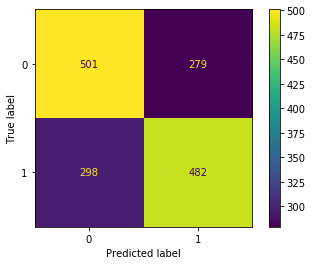

In [24]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot() 

In [25]:
from sklearn.metrics import average_precision_score, roc_auc_score

average_precision_score(y_true, y_pred)

0.5824202297921088

In [26]:
roc_auc_score(y_true, y_pred)

0.6301282051282051